In [3]:
import pandas as pd
import numpy as np
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
engine = create_engine('postgresql+psycopg2://{user}:{passwd}@{host}:{port}/{db}'.format(
        user='postgres',
        passwd=12345,
        host='localhost',
        port='5432',
        db='c2m2'))

In [5]:
business_univariate_stats = pd.read_sql('business_univariate_stats', engine)

In [7]:
business_univariate_stats.head()

,variable,value,label__en,label__ne,variable_group,total,perc_of_total,asked_total,universe,label_index,index
0,m_biz_years_in_operation,1,Less than a year,एक बर्ष भन्दा कम,general,1,0.008929,112,112,2,1
1,m_biz_years_in_operation,2,1 to 2 years,१-२ बर्ष,general,21,0.187500,112,112,3,2
2,m_biz_years_in_operation,4,6 to 10 years,६-१० बर्ष,general,27,0.241071,112,112,4,3
3,m_biz_years_in_operation,3,3 to 5 years,३-५ बर्ष,general,30,0.267857,112,112,5,4
4,m_biz_years_in_operation,5,11 years or above,११ बर्ष वा माथि,general,33,0.294643,112,112,6,5


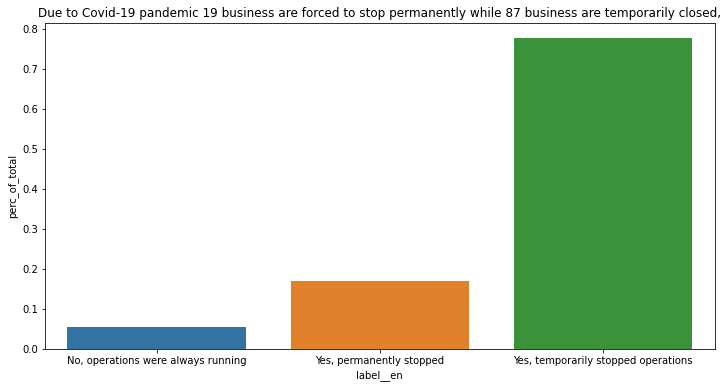

In [25]:
plt.figure(figsize=(12,6))
stopped_business = business_univariate_stats[business_univariate_stats['variable'] == 'i_econ_stop_business']
sns.barplot(data=stopped_business, x='label__en', y='perc_of_total')
plt.title('Due to Covid-19 pandemic {} business are forced to stop permanently while {} business are temporarily closed,'.format(stopped_business['total'].tolist()[1],stopped_business['total'].tolist()[2]))
plt.show()

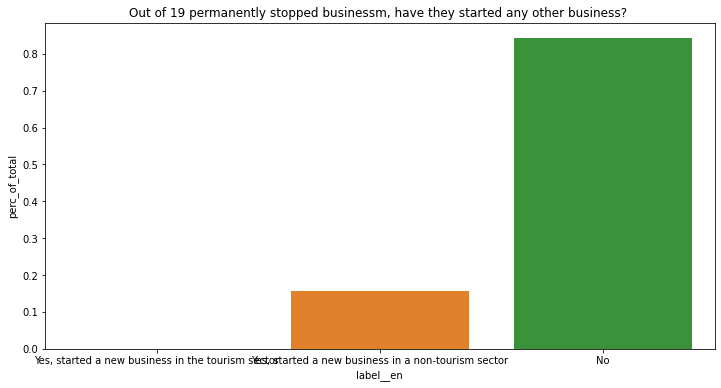

In [27]:
plt.figure(figsize=(12,6))
stopped_business = business_univariate_stats[business_univariate_stats['variable'] == 'o_perm_stop_biz_start_new']
sns.barplot(data=stopped_business, x='label__en', y='perc_of_total')
plt.title("Out of permanently stopped businesses, have they started any other business? ")
plt.show()

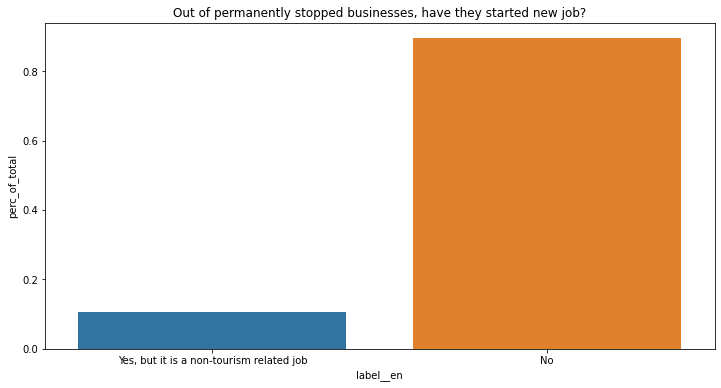

In [32]:
plt.figure(figsize=(12,6))
stopped_business = business_univariate_stats[business_univariate_stats['variable'] == 'o_perm_stop_biz_start_new_job']
sns.barplot(data=stopped_business, x='label__en', y='perc_of_total')
plt.title("Out of permanently stopped businesses, have they started new job?")+
-qs
plt.show()

In [4]:
business = pd.read_excel('../raw/business_data.xlsx')

In [27]:
business['o_perm_stop_biz_start_new_job']

1.0    17
3.0     2
Name: o_perm_stop_biz_start_new_job, dtype: int64

In [33]:
def stopped_business_cond(no_business, tourism_business, non_tourism_business, job_status):
    status = []
    for i in range(len(no_business)):
        value = np.nan
        if no_business[i]==1 and job_status[i]==1:
            value = 1
        elif (tourism_business[i]==1 and job_status[i]==2) or (no_business[i]==1 and job_status[i]==2) or (tourism_business[i]==1 and job_status[i]==1):
            value = 2
        elif (non_tourism_business[i]==1 and job_status[i]==3) or (no_business[i]==1 and job_status[i]==3) or (non_tourism_business[i]==1 and job_status[i]==1):
            value = 3
        elif (tourism_business[i]==1 and job_status[i]==3) or (non_tourism_business[i]==1 and job_status[i]==2) or (tourism_business[i]==1 and non_tourism_business[i]==1):
            value = 4
        status.append(value)
    return status
    

In [34]:
business['status_perm_stopped_business'] = stopped_business_cond(business['o_perm_stop_biz_start_new__1'], 
                                                                 business['o_perm_stop_biz_start_new__2'],
                                                                 business['o_perm_stop_biz_start_new__3'],
                                                                 business['o_perm_stop_biz_start_new_job'])

In [36]:
business['status_perm_stopped_business'].value_counts()

1.0    15
3.0     4
Name: status_perm_stopped_business, dtype: int64

In [39]:
workers = pd.read_excel('../raw/workers_data.xlsx')

In [64]:
def workers_derived_variables(self_location, family_location):
    status = []
    for i in range(len(self_location)):
        value=np.nan
        if self_location[i]==4 and family_location[i] == 1:
            value=1
        else:
            value=2
        status.append(value)
    return status

In [65]:
workers['i_lvlhd_domicile_chng_self_fml'] = workers_derived_variables(workers['i_lvlhd_domicile_chng_self'], workers['i_lvlhd_domicile_chng_fml'])

In [71]:
workers['i_lvlhd_domicile_chng_self_fml'].value_counts()

2    143
1    115
Name: i_lvlhd_domicile_chng_self_fml, dtype: int64

In [72]:
workers['i_lvlhd_domicile_chng_self_fml'] = workers_derived_variables(workers['i_lvlhd_domicile_chng_self'], workers['i_lvlhd_domicile_chng_fml'])

0.5542635658914729

In [87]:
def workers_derive_infection(self_infection, family_infection):
    status = []
    for i in range(len(self_infection)):
        value=np.nan
        if self_infection[i]==2 and family_infection[i]==2:
            value=0
        else:
            value=1
        status.append(value)
    return status

In [88]:
workers['i_hlth_covid_infectn_self_fml']= workers_derive_infection(workers['i_hlth_covid_infectn_self'], workers['i_hlth_covid_infectn_family']) workers[''= workers_derive_infection(workers['i_hlth_covid_infectn_self'], workers['i_hlth_covid_infectn_family'])

In [95]:
workers['i_econ_covid_effects__1']

0      1
1      0
2      0
3      0
4      0
      ..
253    0
254    0
255    1
256    1
257    0
Name: i_econ_covid_effects__1, Length: 258, dtype: int64

In [33]:
def workers_derive_factors(raw_data, columns):
    status=[]
    for i in raw_data[columns].values:
        if np.isnan(i).all()==True:
            status.append(np.nan)
        if 1 in i:
            status.append(1)
        else:
            status.append(0)
    return status

In [34]:
business['i_covid_effect_business__10'] = workers_derive_factors(business, ['i_covid_effect_business__3', 'i_covid_effect_business__4', 
                                                                            'i_covid_effect_business__8', 'i_covid_effect_business__10'])
business['i_covid_effect_business__6'] = workers_derive_factors(business, ['i_covid_effect_business__6', 'i_covid_effect_business__7'])

In [35]:
business['i_covid_effect_business__10'].value_counts()

0    84
1    28
Name: i_covid_effect_business__10, dtype: int64